In [163]:
# Imported the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
# Loaded the dataset and displayed the first 5 rows.
df = pd.read_csv("titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [165]:
# Displayed the info of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [166]:
# Displayed the description of the dataset. 
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [167]:
# Displayed the data types of each column.
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [168]:
# Checking for any null values in the dataset.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [169]:
df.shape

(418, 12)

In [ ]:
# Dropped the  column due to a high number of missing values as not much important.
df=df.drop(["Cabin","Name","Ticket"],axis=1)


In [171]:
df["Sex"].unique()
df.replace({'male': 0, 'female': 1}, inplace=True)

C:\Users\mayan\AppData\Local\Temp\ipykernel_4540\244539391.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'male': 0, 'female': 1}, inplace=True)


In [172]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,Q
1,893,1,3,1,47.0,1,0,7.0000,S
2,894,0,2,0,62.0,0,0,9.6875,Q
3,895,0,3,0,27.0,0,0,8.6625,S
4,896,1,3,1,22.0,1,1,12.2875,S


In [173]:
# Applied floor function to the median age and displayed the result.
import math
median_age= math.floor(df["Age"].median())
median_age

27

In [174]:
# Filled the missing values in the 'Age' column with the median age and checked for any remaining null values.
df["Age"]= df["Age"].fillna(median_age)
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [175]:
df= df.dropna(subset=["Fare"])


In [176]:
# Converted categorical variables into dummy/indicator variables.
df2 = pd.get_dummies(df, columns=["Embarked"], drop_first=True)


In [177]:
df2.shape

(417, 10)

In [178]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

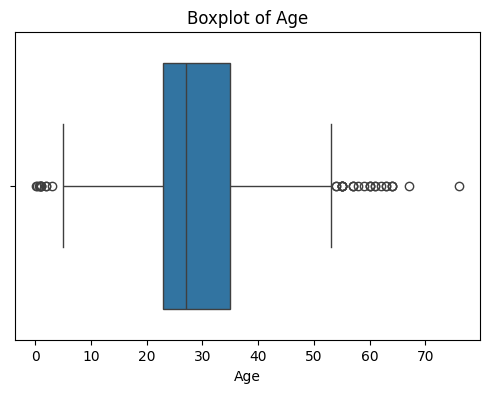

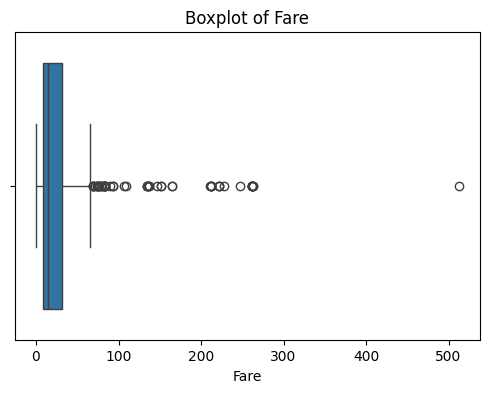

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose numeric columns where outliers might exist
num_cols = ["Age", "Fare"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [ ]:
# Removing the outliers.
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to Age and Fare
df = remove_outliers(df, "Age")
df = remove_outliers(df, "Fare")


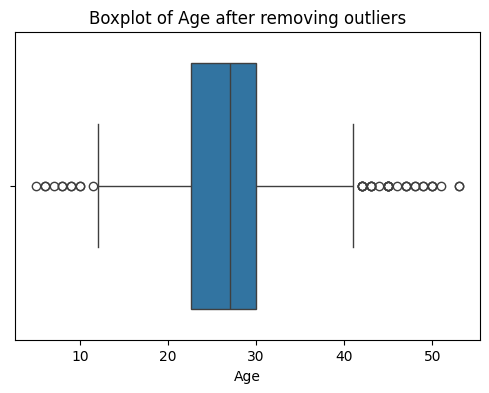

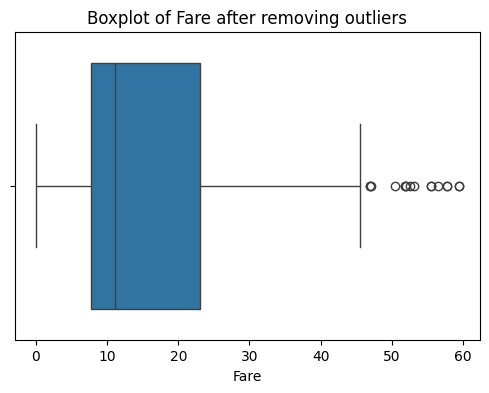

In [ ]:
# Ploting the graph after removing outliers.
for col in ["Age", "Fare"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} after removing outliers")
    plt.show()
